# Machine-learning, the foundation

This notebook introduces the jargon/defines terminology that we will use throughout this course and is in common use in machine-learning circles.

Depending on your heritage you might use other words for these concepts. I recommend you try and become familiar with this language (and translate in your head to your words). It makes it easier to communicate with machine-learning people and let's you read articles/blog posts.

> A lot of time is spent misunderstanding each other, most often this is because we use the same word but mean different things. Or use different words for the same thing. The machine-learning community is quite precise in their use of language, other fields sometimes are more confused about how they name things.

Machine Learning is about building programs with tunable parameters that are adjusted automatically to improve the program's behaviour by adapting to previously seen data.

To introduce the jargon and terms we will look at a simple classification problem. Given these red and blue dots we want to learn a model that can tell us what colour a new point is going to be. By learning this separating bouondary we obtain a model that generalises: It works with data that we have never seen before.

<img src="../images/moons.png" />

We will use a simple dataset to get going. The task is to classify the type of tree (blue or red) based on the coordinates at which the tree is planted.

The data will always be organised as a 2D matrix `X` with shape: `n_samples` by `n_features`. Each row is one sample, with each column containing the values for a feature.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

# creating our toy dataset
labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

The features of each sample are stored in the `X` variable:

In [2]:
X.shape

(400, 2)

This tells us that we have 400 samples with 2 features each. The measurements for the first sample:

In [3]:
print(X[0])

[-4.21978613 -1.71762081]


The next ingredient we need is the target, the true value of the type of iris that each sample is.

In [4]:
y

array(['b', 'r', 'r', 'r', 'b', 'b', 'r', 'b', 'r', 'b', 'b', 'r', 'b',
       'r', 'r', 'r', 'r', 'b', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'r', 'r', 'b', 'r', 'b', 'r', 'r', 'r', 'b', 'b',
       'r', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'r', 'r', 'r', 'b', 'r',
       'b', 'r', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'r', 'b', 'r', 'r',
       'b', 'b', 'r', 'b', 'b', 'r', 'b', 'b', 'r', 'b', 'b', 'b', 'b',
       'b', 'b', 'r', 'r', 'r', 'b', 'b', 'r', 'b', 'b', 'r', 'r', 'r',
       'b', 'b', 'b', 'r', 'b', 'b', 'b', 'r', 'r', 'b', 'r', 'b', 'r',
       'r', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'r', 'b', 'r', 'r',
       'r', 'b', 'r', 'r', 'r', 'r', 'r', 'b', 'r', 'r', 'b', 'b', 'b',
       'b', 'b', 'r', 'r', 'b', 'b', 'r', 'b', 'r', 'b', 'b', 'b', 'r',
       'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r',
       'r', 'r', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'b', 'b', 'b', 'b',
       'b', 'r', 'b', 'r', 'b', 'r', 'b', 'r', 'b', 'r', 'b', 'b

We see that there are two different classes:
* blue
* red

Let's plot our data:

Text(0,0.5,'Feature 2')

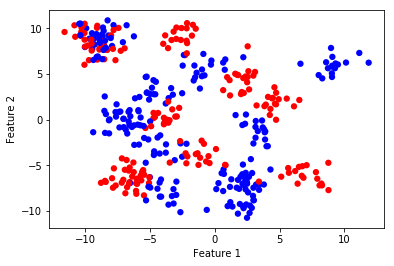

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

## The scikit-learn `Estimator` interface

All algorithms in scikit-learn follow the `Estimator` interface. Because of the dominance of scikit-learn a lot of other lirbaries adopt this interface as well. Some libraries are less strict...

In [6]:
# The defacto standard interface used for Python based machine-learning
class Estimator:
    def __init__(self, parameter1):
        """Construct a new Estimator.
        
        All hyper-parameters are passed as constructor
        arguments.
        """
        self.parameter1 = parameter1

    def fit(self, X, y=None):
        """Fit estimator to data."""
        # set state of `self` by learning from `X` (and `y`)
        return self
    
    def predict(self, X):
        """Make predictions for `X`.
        
        An estimator can only make predictions
        after it has been `fit()`.
        """
        # returns predictions for `y` at `X`
        #
        # pass is a Python keyword to signal an empty
        # clause, just here to notebook syntactically valid.
        pass

    def score(self, X, y_true):
        """Compute score using default scorer of the estimator"""
        # returns a score
        pass

In Supervised Learning, we have a dataset consisting of both features and labels. The task is to construct an estimator which is able to predict the label of an object given the set of features. A relatively simple example of this is predicting the type of tree based on its coordinates. However everything here also applies to more complex problems like predicting the name of the person in a colour picture, detecting pedestrians in a street scene, etc.

K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class. Let’s try it out on our iris classification problem:

In [7]:
from sklearn import neighbors, datasets


knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

What if we received a new observation at `[3., -2.5]`. What would you predict its colour to be?

In [8]:
knn.predict([[3., -2.5]])

array(['b'],
      dtype='<U1')

In [9]:
knn.predict([[3., -2.5], [3., +2.5]])

array(['b', 'r'],
      dtype='<U1')

We can repeat this exercise for the whole area:

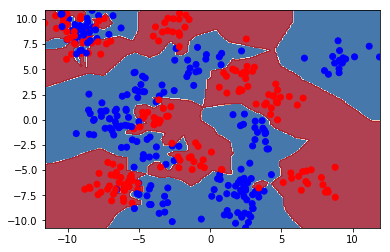

In [10]:
def plot_surface(clf, X, y, n_steps=250, subplot=None, show=True,
                 ylim=None, xlim=None):
    """Plot decision surface of `clf`"""
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)

    if xlim is None:
        xlim = X[:, 0].min(), X[:, 0].max()
    if ylim is None:
        ylim = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps),
                         np.linspace(ylim[0], ylim[1], n_steps))

    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)


plot_surface(knn, X, y)

The important take away here is that we learnt the decision rule from the data. If we were asked to work on a new problem we could keep most of the code the same.

All we need is a new dataset (with `X` and `y`), learn the decision rule for the new data and we are done. The decision rule would be different, but the way to operate the machinery would remain the same.


## Classifying hand written digits

Let's demonstrate this by moving to a slightly more complicated dataset. Small images of hand written digits between zero and nine.

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()

Let's exercise our matplotlib skills and make a plot of the data:

True label: 1


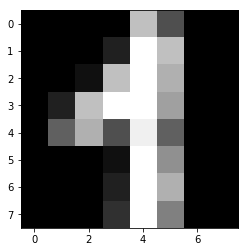

In [12]:
plt.imshow(digits.images[42], cmap='gray')
print("True label:", digits.target[42])

Each picture is is eight pixels wide and eight pixels high.

You can access the targets/labels using `digits.target` and
the features for each sample via `digits.data`.

### Questions

* How many features do we have?
* How many samples are there?
* How many classes are there?

In [13]:
### BEGIN SOLUTION

print("There are %i samples." % digits.data.shape[0])
print("Each sample has %i features." % digits.data.shape[1])
print("There are %i different classes." % len(np.unique(digits.target)))

### END SOLUTION

There are 1797 samples.
Each sample has 64 features.
There are 10 different classes.


In [14]:
X = digits.data
y = digits.target

In [15]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
knn.predict(X[42:44])

array([1, 7])

You see, everything stayed the same.

Next we might want to measure the performance of our algorithm. How many mistakes does it make?

## Measuring performance

Most estimators have a builtin, default metric that you can access via the `score(X, y_true)` method:

In [17]:
knn.score(X, y)

1.0

In [18]:
# What does it do?
#knn.score?

What mistake did we just make?

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.

Ultiamtely what we are interested in is making predictions for samples that are from the future!

To avoid over-fitting, we have to define two different sets:

* a training set `(X_train, y_train)` which is used for learning the parameters of a predictive model
* a testing set `(X_test, y_test)` which is used for evaluating the fitted predictive model

In scikit-learn such a random split can be quickly computed with the `train_test_split()` function.


## Performance on unseen data

In [19]:
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [20]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [21]:
knn.score(X_test, y_test)

0.98444444444444446

This isn't a very difficult problem, so we get a very good score without much work.

You can also get a classification report that gives some more detail:

In [22]:
from sklearn import metrics

print(metrics.classification_report(y_test, knn.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        42
          1       0.98      1.00      0.99        50
          2       1.00      1.00      1.00        47
          3       0.98      1.00      0.99        48
          4       1.00      0.93      0.96        40
          5       1.00      1.00      1.00        52
          6       1.00      1.00      1.00        43
          7       0.96      1.00      0.98        49
          8       0.95      0.97      0.96        40
          9       0.97      0.92      0.95        39

avg / total       0.98      0.98      0.98       450



What if we split the data in a different way, using a different random seed? Should we prefer one split over another?

## Cross-validation

Cross-validation consists of repetively splitting the data into pairs of train and test sets, called ‘folds’. Scikit-learn comes with a function to automatically compute the score on all of these folds. Here we use `KFold` with `k=5`.

In [23]:
from sklearn.model_selection import cross_val_score

# This will split the data into five sets,
# train on four of them, measure the performance
# on the fifth and keep rotating through the
# splits. We get five estimates of the performance
cross_val_score(knn, X, y, cv=5)

array([ 0.96153846,  0.95303867,  0.96657382,  0.98879552,  0.95492958])

There are [many different cross-validation strategies](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators) which are all available in scikit-learn.

## Exercise

Use the `LogisticRegression` algorithm to create a classifier that can differentiate benign from malignant breast cancer tumors.

Answer the following questions:
* how many features does each sample have?
* how many samples are in this dataset?
* how many different classes are there?
* what is your estimate of the generalisation error, or said differently: what accuracy do you predict this classifier will achieve on unseen data?

In [24]:
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [25]:
### BEGIN SOLUTION
X = cancer.data
y = cancer.target

print("There are %i samples." % X.shape[0])
print("Each sample has %i features." % X.shape[1])
print("There are %i different classes." % len(np.unique(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LogisticRegression()

lr.fit(X_train, y_train)

print("Train score: %.3f" % lr.score(X_train, y_train))
print("Test score: %.3f" % lr.score(X_test, y_test))

print("Cross validation scores:", cross_val_score(lr, X, y, cv=5))
### END SOLUTION

There are 569 samples.
Each sample has 30 features.
There are 2 different classes.
Train score: 0.958
Test score: 0.951
Cross validation scores: [ 0.93913043  0.93913043  0.97345133  0.94690265  0.96460177]


## Summary

A summary of the important terms:

* samples: each set of measurements is a sample. For example a row of a database
* features: each property of a sample is a feature
* labels: the label/category we want to predict for each sample
* supervised learning: we have a dataset `X` that is a 2D matrix with `n_samples` rows and `n_features` columns, and a set of true labels for each sample stored in `y`
* our goal is to learn parameters from the dataset that generalise, this allows us to make predictions for examples we have not yet seen